In [7]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys,os
sys.path.insert(0,'../..')

In [8]:
# filename = input("Write the name of data like this type( ../Data/eil51_json_array.txt ):  ")
filename = "../../data/eil51_json_array.txt"
with open(filename, 'r') as myfile:
    data=myfile.read().replace('\n', '')
data = eval(data)
data = np.array(data)
data[:5]

array([[37, 52],
       [49, 49],
       [52, 64],
       [20, 26],
       [40, 30]])

In [9]:
# iteration = int(input("Please enter the number of iterations to execute random approach:  "))
iteration = 20000
path_distance = lambda r, c: np.sum([int(np.linalg.norm(c[r[p]] - c[r[p - 1]])+1) for p in range(len(r))])
route = np.arange(data.shape[0])
best_distance = path_distance(route, data)
last_route = list(route)
first_route = list(route)
print(first_route[:5])
print(best_distance)

#Starting route from 0 to N
# 20000  iteration number.

[0, 1, 2, 3, 4]
1345


In [13]:
start_time = time.time()
for i in range(iteration):
    np.random.shuffle(route)
    test_route = route
    new_distance = path_distance(test_route, data)
    if new_distance < best_distance:
        last_route = list(test_route)
        best_distance = new_distance
finish_time = time.time()
duration = finish_time-start_time
last_route.append(last_route[0])

In [14]:
print("The route is :", last_route)
print("Number of iteration is: ",iteration)
print("Total execution time is: ",duration," seconds")
print("Total distance is:", best_distance)


The route is : [0, 36, 4, 47, 16, 23, 8, 48, 14, 42, 15, 30, 37, 24, 12, 43, 50, 32, 44, 10, 49, 19, 27, 35, 1, 5, 31, 25, 26, 33, 38, 9, 29, 20, 7, 2, 6, 22, 46, 40, 41, 39, 18, 13, 11, 28, 45, 3, 34, 21, 17, 0]
Number of iteration is:  20000
Total execution time is:  10.63969349861145  seconds
Total distance is: 1319


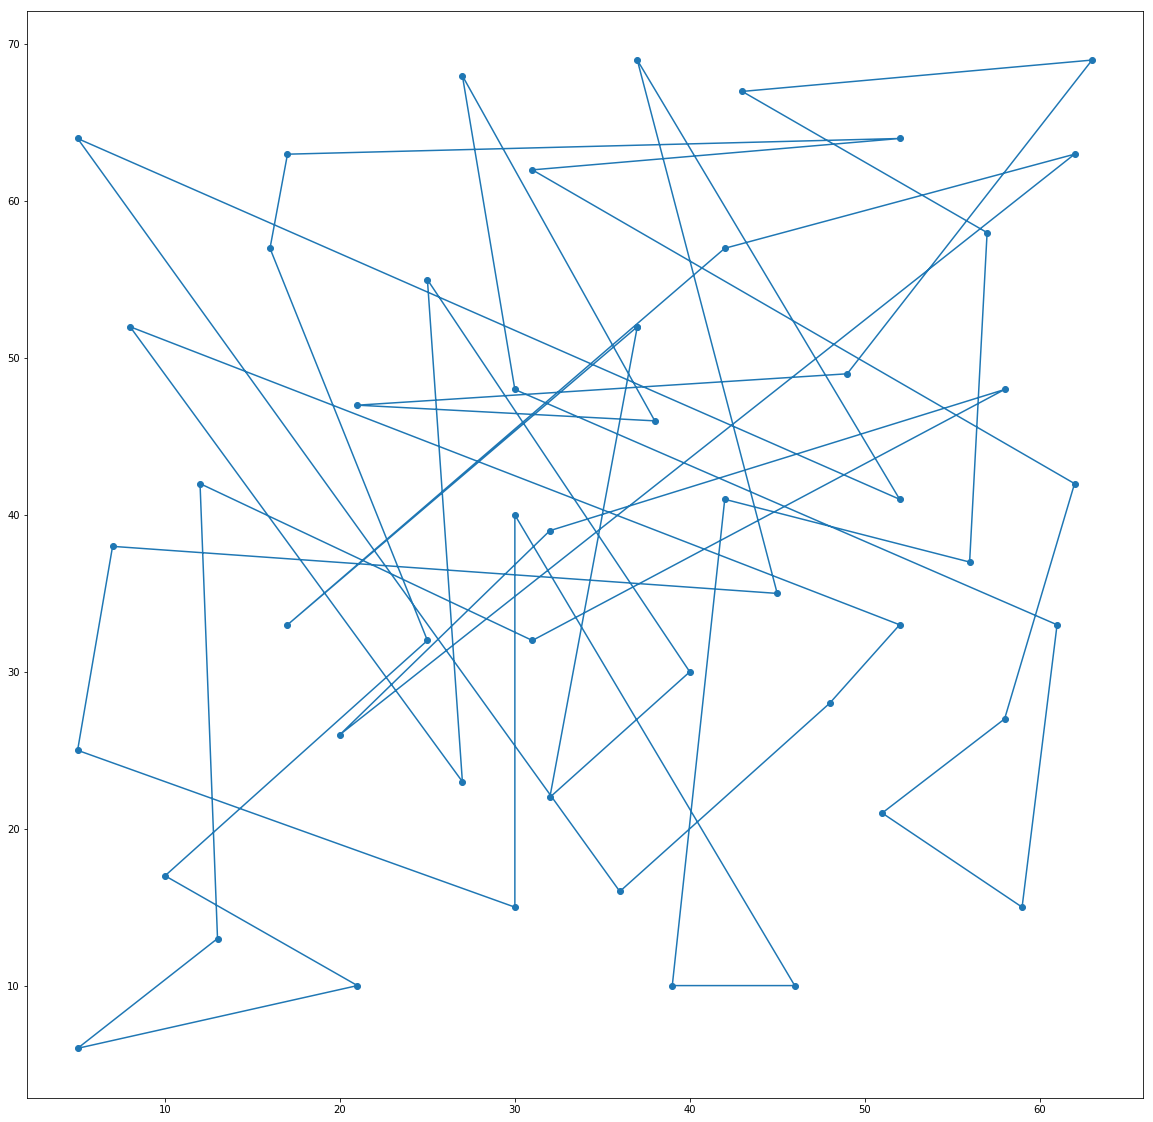

Total execution time is:  10.63969349861145  seconds
Total distance is :  1319


In [15]:
plt.figure(figsize=(20,20))

opt_route = list(last_route)
opt_route = np.array(opt_route)

data_json = list(data)
data_json.append(data_json[0])
data_json = np.array(data_json)

# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_json[opt_route[i]] for i in range(len(opt_route))]),np.array([data_json[0]])))
# Plot the cities.
plt.scatter(data_json[:,0],data_json[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
print("Total execution time is: ",duration," seconds")
print("Total distance is : ",best_distance)